In [178]:
%%file helper_func/load_all.m
function imgs = load_all(imgpath, names, print)
    imgs = {}; addpath(imgpath);

    for i=1:length(names)
        img = im2double(imread(names{i}));
        if length(size(img))==3
            img = rgb2gray(img);
        end
        imgs{end+1} = img;

        if print
            f = figure;
            imshow(img);
        end
    end
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\load_all.m'.


In [67]:
addpath('helper_func/');
filenames = {'moonlanding.png', 'psnr2.png'};
part2imgs = load_all('/', filenames, false);

In [179]:
%%file helper_func/part2.m
function processed = part2(img, ksize, sigma)

    f = figure;
    [imgM, imgP] = part1bstep3(img);

    % new_moonM = moonM;
    minM = min(imgM(:))
    maxM = max(imgM(:))
    avgM = mean(imgM(:))

    normZ = maxM - minM;

    filter = fspecial('gaussian', [ksize, ksize], sigma);

    shiftM = (imgM - minM)/normZ;

    alpha = shiftM;

    alpha = medfilt2(alpha);

    alphaS = size(alpha);
    alpha = padarray(alpha,[1, 1],'replicate');
    alpha = imfilter(alpha, filter, 'conv');
    alpha = alpha(2:alphaS(1)+1, 2:alphaS(2)+1);

    alpha = medfilt2(alpha);
    normA = max(alpha(:)) - min(alpha(:));
    alpha = alpha/normA;


    new_imgM = alpha * normZ + minM;

    new_img = ifft2(exp(new_imgM) .* exp(j * imgP));
    processed = real(new_img);


    f = figure;
    a = subplot(2, 2, 1);
    imshow(fftshift(alpha),[]);
    title('alpha');
    a = subplot(2, 2, 2);

    imshow(fftshift(new_imgM),[]);;
    title('new magnitude');


    f = figure;
    a = subplot(2, 2, 3);
    imshow(img);
    title('original');
    a = subplot(2, 2, 4);
    imshow(processed);
    title('ifft');

    f = figure;
    imshow(processed);
    title('result');
    
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part2.m'.



minM =

   -2.4068


maxM =

   11.7488


avgM =

    3.5344




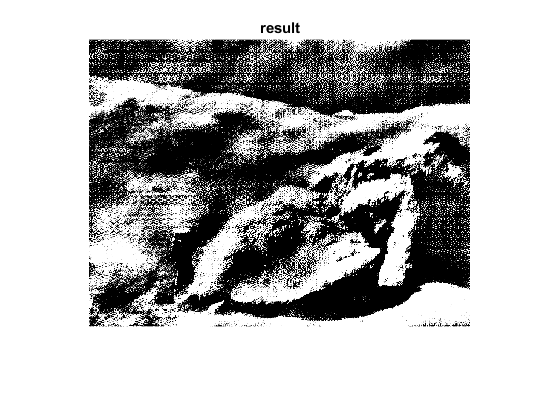

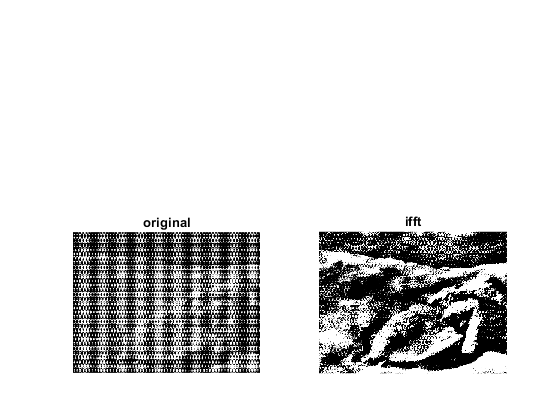

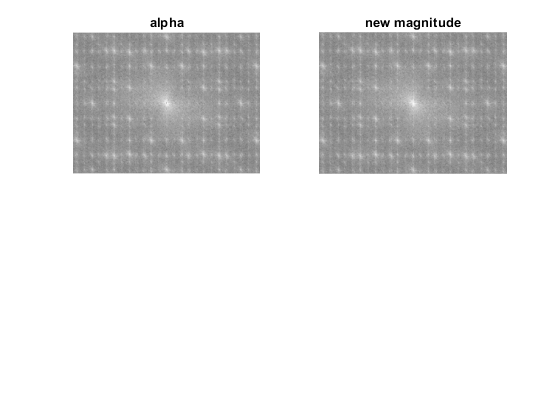

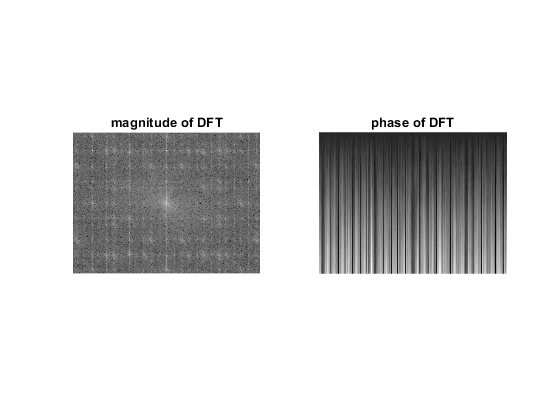

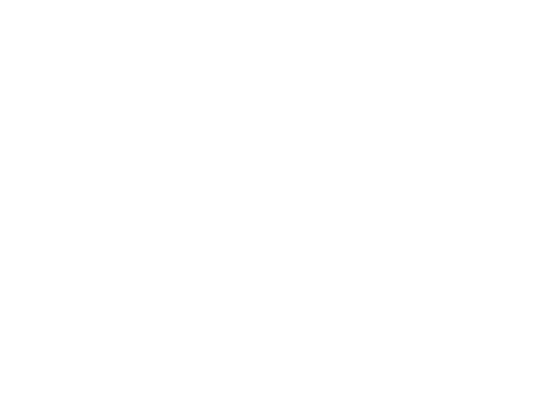

In [181]:
moon_test = part2(part2imgs{1}, 3, 1);

## 


minM =

   -2.0414


maxM =

   10.3304


avgM =

    2.9724




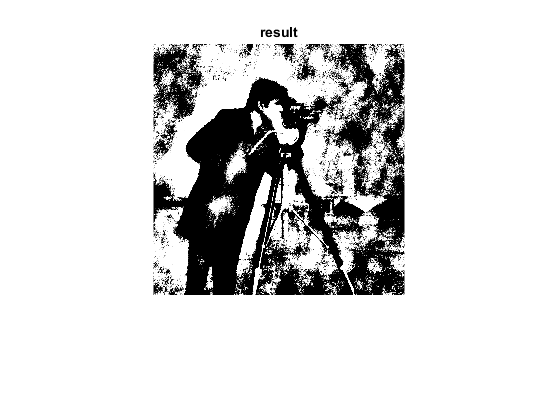

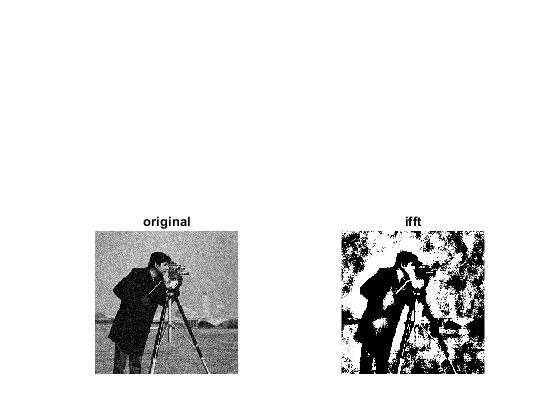

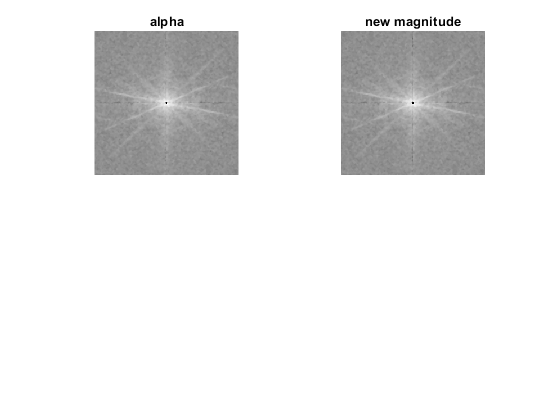

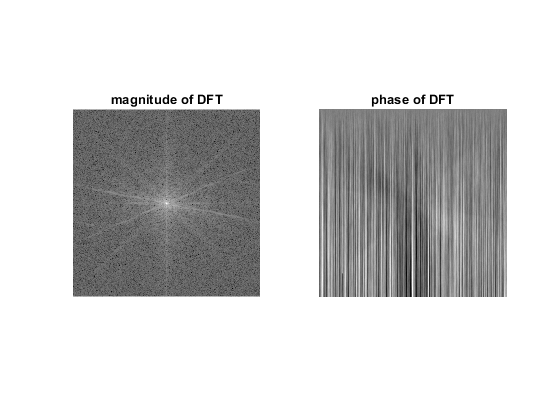

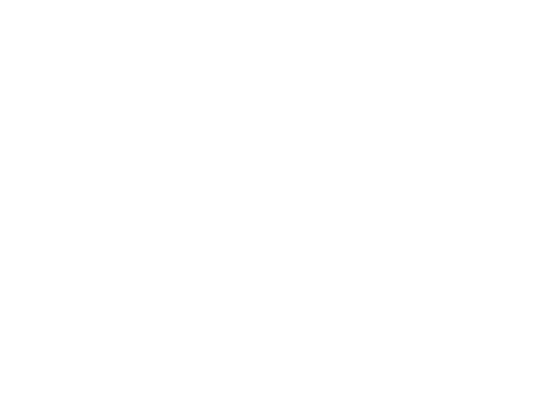

In [183]:
psnr2_test = part2(part2imgs{2}, 2, 1);